In [4]:
#Import Library
import pandas as pd
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
#Load dataset
df = pd.read_csv('Accidents0515.csv')
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,4/1/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,5/1/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,6/1/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,7/1/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/1/2005,...,0,0,7,1,2,0,0,1,1,E01002863


# Tiền xử lý

# Hồi quy Logistic (K-means Analysis)

In [27]:
from sklearn.impute import SimpleImputer

# Chọn các cột số liệu cần thiết
features = df[['Latitude', 'Longitude', 'Number_of_Vehicles', 'Number_of_Casualties']]

# Tạo đối tượng SimpleImputer để thay thế giá trị thiếu bằng giá trị trung bình
imputer = SimpleImputer(strategy='mean')

# Thay thế giá trị thiếu trong dữ liệu
features_imputed = imputer.fit_transform(features)

In [28]:
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

Chọn số lượng Cụm

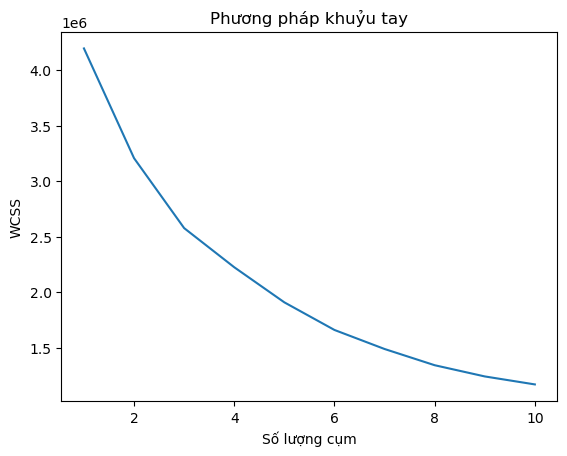

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Xác định số lượng cụm tối ưu
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Phương pháp khuỷu tay')
plt.xlabel('Số lượng cụm')
plt.ylabel('WCSS')
plt.show()

In [34]:
# Áp dụng K-means clustering
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Áp dụng Visualization of K-means Clustering

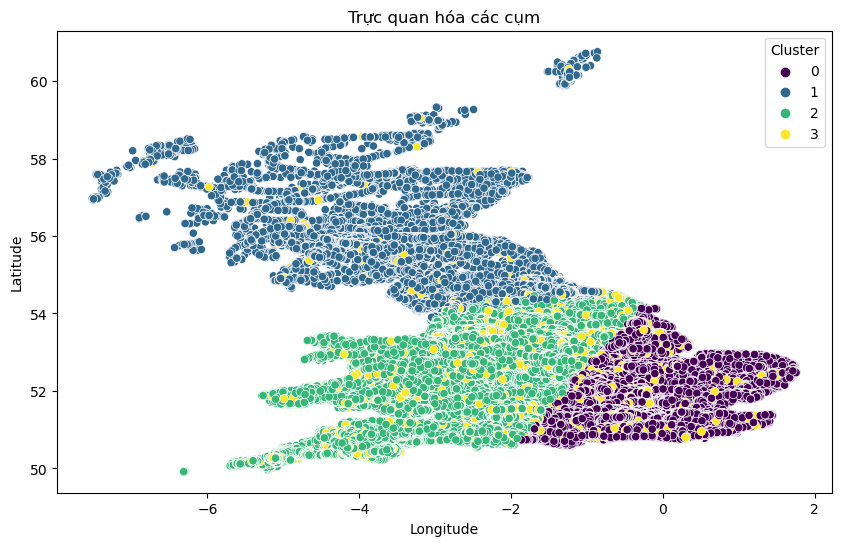

In [35]:
import seaborn as sns

# Trực quan hóa các cụm
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', palette='viridis', data=df)
plt.title('Trực quan hóa các cụm')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()